In [42]:
import numpy as np
import pinocchio as pin

DATA_PATH = "/home/atari_ws/data/learning_jump_feasibility/data.npz"

data = np.load(DATA_PATH)

state = data["state"]
feet_contact = data["contact"]
target_contact = data["target"]
collision = data["collision"]

feet_contact_b = np.empty_like(feet_contact)
target_contact_b = np.empty_like(target_contact)

def transform_points(T_b_W, points_w):
    # Add a fourth homogeneous coordinate (1) to each point
    ones = np.ones((points_w.shape[0], 1))
    points_w_homogeneous = np.hstack((points_w, ones))

    # Apply the transformation matrix
    points_b_homogeneous = T_b_W @ points_w_homogeneous.T
    
    # Convert back to 3D coordinates
    points_b = points_b_homogeneous[:3, :].T
    
    return points_b
    
for i, s in enumerate(state):
    if s[0] != 0.:
        # R base in world frame
        w_T_b = pin.XYZQUATToSE3(s[:7])
        # w_R_b = w_T_b.rotation
        # # Set roll and pitch to 0.
        # rpy_vector = pin.rpy.matrixToRpy(w_R_b)
        # rpy_vector[:2] = 0.0  # Set roll and pitch to 0
        # # R world in base frame
        # w_R_b = pin.rpy.rpyToMatrix(rpy_vector)
        # w_T_b.rotation = w_R_b
        
        b_T_W = w_T_b.inverse()
        
        feet_contact_b[i, :] = transform_points(b_T_W, feet_contact[i])
        target_contact_b[i, :] = transform_points(b_T_W, target_contact[i])
    
print(state.shape)
print(feet_contact_b.shape)
print(target_contact_b.shape)
print(collision.shape)

(727, 37)
(727, 4, 3)
(727, 4, 3)
(727, 5)


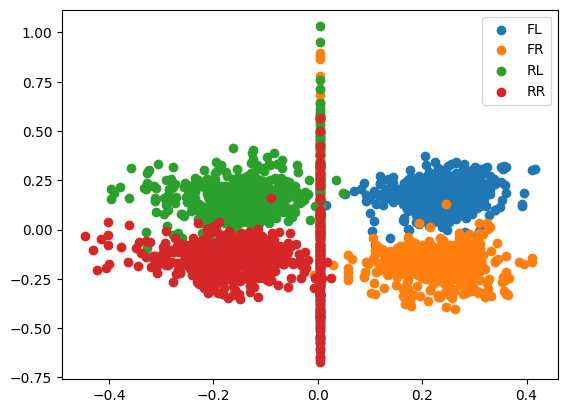

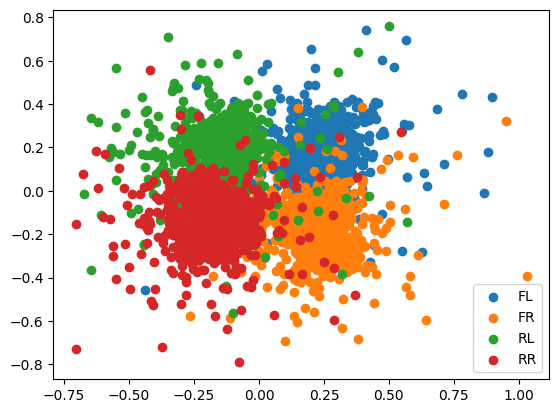

In [43]:
import matplotlib.pyplot as plt
FEET = ["FL", "FR", "RL", "RR"]

for id_foot in range(feet_contact.shape[1]):
    plt.scatter(*np.split(feet_contact_b[:, id_foot, :2], 2, axis=-1), label=FEET[id_foot])
plt.legend()
plt.show()

for id_foot in range(target_contact.shape[1]):
    plt.scatter(*np.split(target_contact_b[:, id_foot, :2], 2, axis=-1), label=FEET[id_foot])
plt.legend()
plt.show()


plt.show()

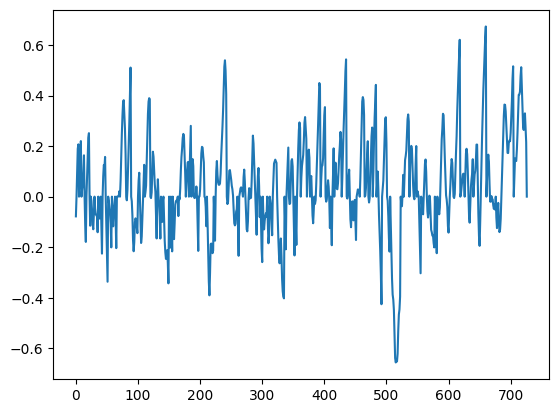

In [35]:
plt.plot(state[:, 0])
plt.show()

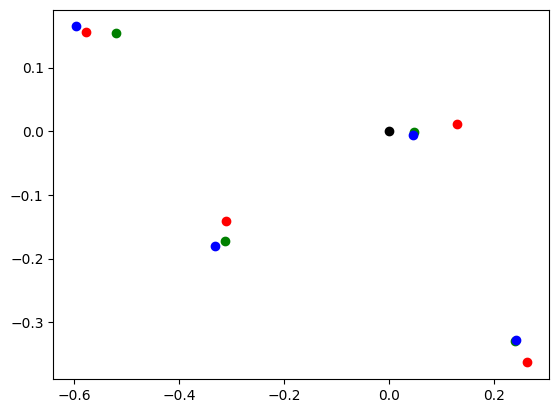

In [41]:
ID = 100
for id_foot in range(feet_contact.shape[1]):
    plt.scatter(*np.split(feet_contact[ID, id_foot, :2], 2, axis=-1), c="g")

for id_foot in range(target_contact.shape[1]):
    plt.scatter(*np.split(target_contact[ID - 1, id_foot, :2], 2, axis=-1), c="b")

for id_foot in range(target_contact.shape[1]):
    plt.scatter(*np.split(target_contact[ID, id_foot, :2], 2, axis=-1), c="r")


plt.scatter(*np.split(state[ID, :2], 2), c="k")
plt.show()